In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np

In [62]:
df_ROS = pd.read_csv('../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS.head(2)

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


#### 데이터 전처리 
- 데이터의 갯수가 맞아야 함 
- 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려

In [45]:
df_ROS_select = df_ROS[['입원기간','체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI','수술기법']]

In [46]:
df_ROS_select.isnull().sum()

입원기간           0
체중             0
연령             0
신장             0
전방디스크높이(mm)    0
후방디스크높이(mm)    0
디스크단면적         0
디스크위치          0
PI             0
수술기법           0
dtype: int64

### 상관관계 확인 
- 목표 변수 : '입원기간' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인 
- 설명 변수 : 
    - '성별' : 남성 발생률이 높은 것 같음.
    - '신장' : 목표변수 대비 분포 변화 적음.
    - '심혈관질환' : 질환자는 재발율이 상대적으로 높음.
    - '체중' : 몸무게 차이 따라 분포 변화 영향 있음.
    - '흡연여부' : 흡엽자는 재발율 상대적으로 높음.
    - '연령' : 상대적으로 나이 많으면 발생률이 높은 것으로 보임.
    - '직업': 건설업/수산업자 분들의 발생률이 상대적으로 높음.
    - '혈액형' : 차이에 여부 확인 필요(확증데이터 분석)
- 분석 story : 재발 방지를 줄이기 위해서는 흡연을 피하고, 체중을 줄이는것이 우선임

#### 데이터 타입과 분포  
- 목표 변수 확인 
    - 데이터는 연속형이나, 압도적으로 '1'의 값이 많아 범주형으로 데이터를 쓰고자 함.

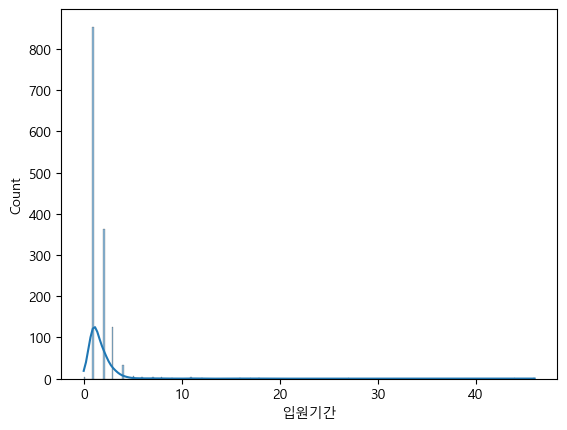

In [47]:
sns.histplot(data=df_ROS_select, x='입원기간',kde=True)
plt.show()

In [48]:
df_ROS_select['입원기간'].value_counts()

1     854
2     364
3     125
4      32
5       6
0       3
6       3
11      3
7       3
8       3
17      2
27      1
44      1
46      1
9       1
18      1
16      1
12      1
Name: 입원기간, dtype: int64

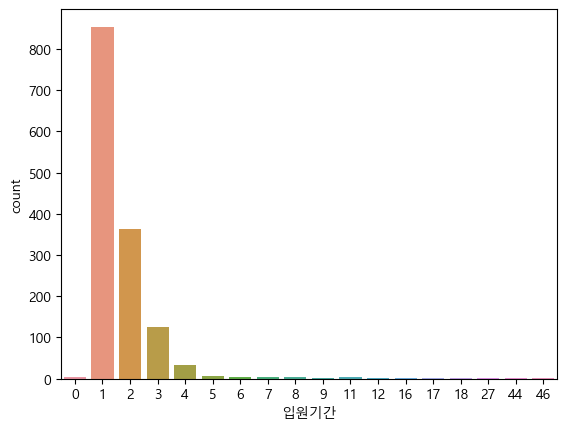

In [49]:
sns.countplot(data=df_ROS_select, x='입원기간')
plt.show()

In [51]:
df_ROS_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   입원기간         1405 non-null   int64  
 1   체중           1405 non-null   float64
 2   연령           1405 non-null   int64  
 3   신장           1405 non-null   int64  
 4   전방디스크높이(mm)  1405 non-null   float64
 5   후방디스크높이(mm)  1405 non-null   float64
 6   디스크단면적       1405 non-null   float64
 7   디스크위치        1405 non-null   int64  
 8   PI           1405 non-null   float64
 9   수술기법         1405 non-null   object 
dtypes: float64(5), int64(4), object(1)
memory usage: 109.9+ KB


#### 목표 변수와 각 설명 변수의 관계 확인

In [58]:
df_ROS_GB.corr()

#  입원기간에 따라 선택한 설명변수가 크게 영향을 미치는 변수는 없어보임 (0에 가깝기 때문에)

C:\Users\02-19\AppData\Local\Temp\ipykernel_2780\3453104008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ROS_GB.corr()


,입원기간,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI
입원기간,1.000000,-0.047024,0.079106,-0.044577,-0.022702,-0.019827,0.007434,-0.003919,-0.004285
체중,-0.047024,1.000000,-0.109821,0.681335,0.060500,0.033339,0.203423,-0.004002,-0.014550
연령,0.079106,-0.109821,1.000000,-0.246746,0.119757,-0.007422,0.171296,-0.100640,0.025562
신장,-0.044577,0.681335,-0.246746,1.000000,0.069743,0.061521,0.185399,-0.010945,-0.025036
전방디스크높이(mm),-0.022702,0.060500,0.119757,0.069743,1.000000,0.191183,0.212328,-0.010699,-0.063635
후방디스크높이(mm),-0.019827,0.033339,-0.007422,0.061521,0.191183,1.000000,0.103048,0.011169,-0.055430
디스크단면적,0.007434,0.203423,0.171296,0.185399,0.212328,0.103048,1.000000,-0.038575,-0.070085
디스크위치,-0.003919,-0.004002,-0.100640,-0.010945,-0.010699,0.011169,-0.038575,1.000000,-0.022225
PI,-0.004285,-0.014550,0.025562,-0.025036,-0.063635,-0.055430,-0.070085,-0.022225,1.000000


### 시각화 확인  
- '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'

- 수술기법 : 'TELD'기법을 압도적으로 많이 사용했음을 확인함. 해당 기법을 사용하면 입원기간이 짧아지는지의 여부를 확인할 필요가 있음
- 그 외 다른 연속형 데이터들을 해당그래프를 통해 입원기간에 미치는 영향을 파악하기에는 미비함. 더 자세한 분석을 통해 입원기간에 미치는 영향을 확인해봐야 함.

In [59]:
df_ROS_GB['입원기간'] = df_ROS_GB['입원기간'].astype(object )

In [53]:
continous_list = df_ROS_select.describe().columns
continous_list

Index(['입원기간', '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적',
       '디스크위치', 'PI'],
      dtype='object')

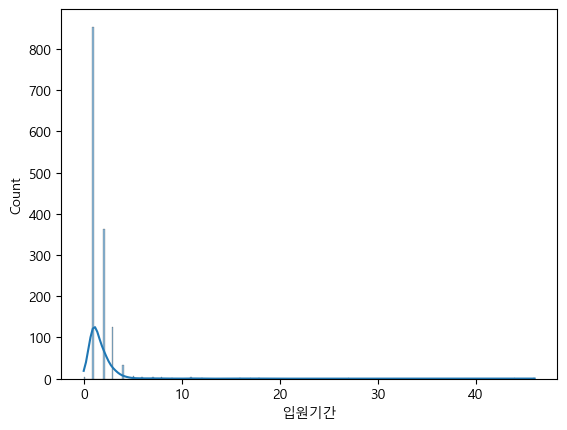

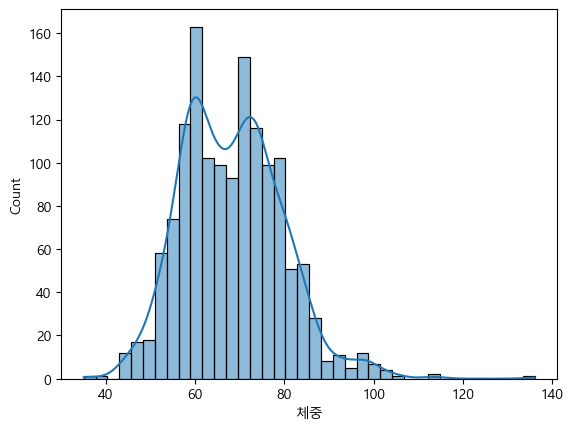

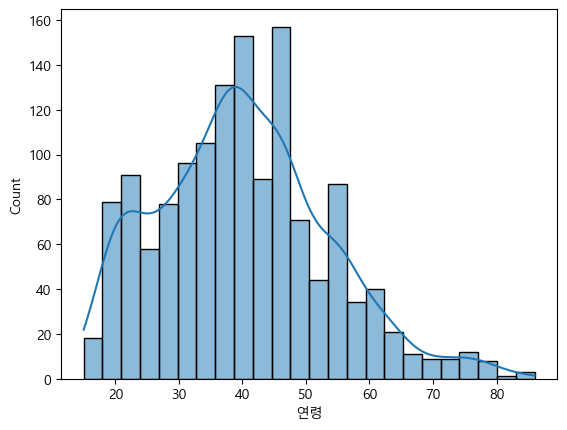

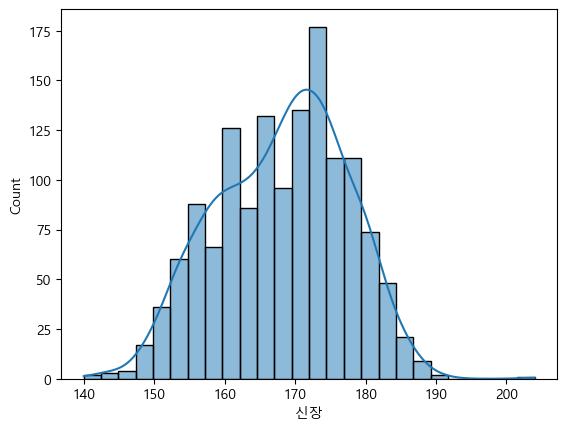

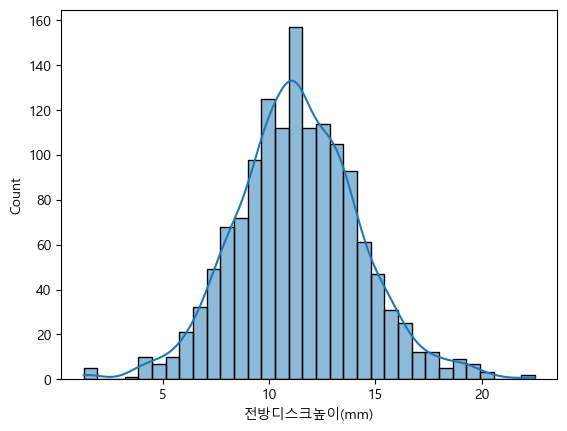

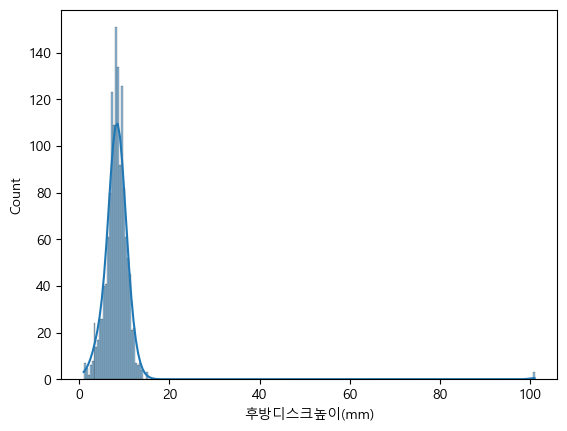

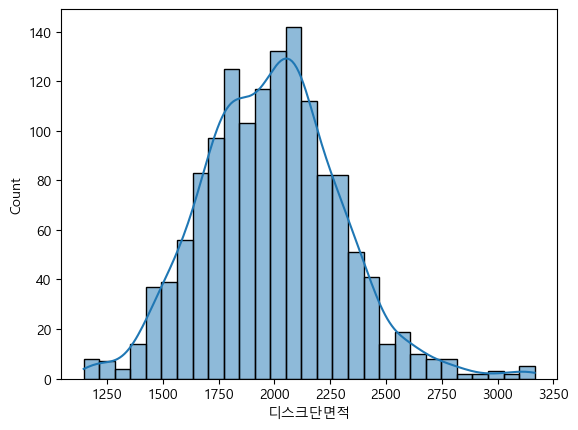

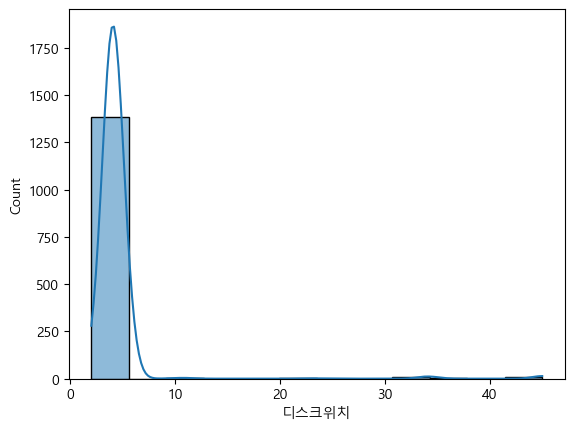

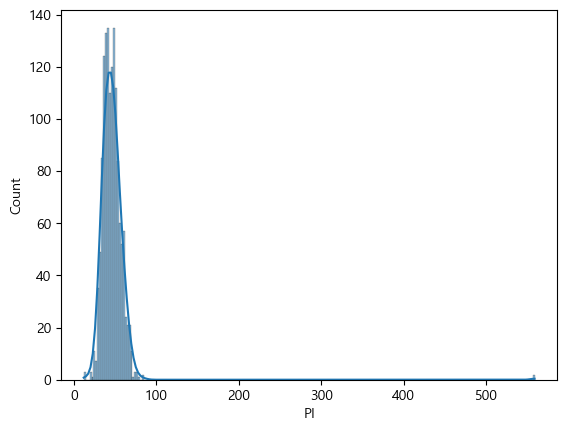

In [60]:
## for문을 사용해서 histplot 그래프 

for  continous in continous_list : 
    sns.histplot(data=df_ROS_GB, x=continous, kde=True) # 연속형 histplot그래프 사용  #hue='입원기간'
    plt.show()

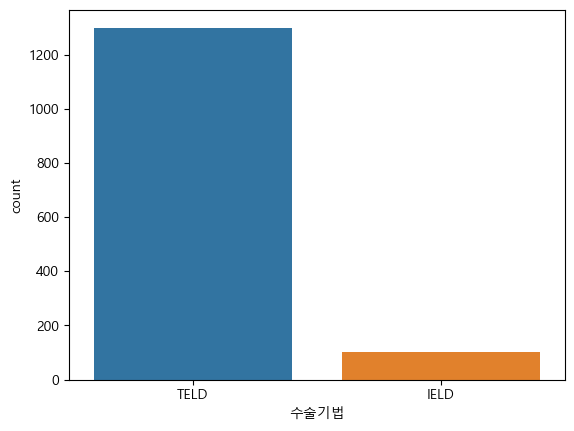

In [64]:
sns.countplot(data=df_ROS, x='수술기법')
plt.show()

# 압도적으로 'TELD'기법을 많이 사용함

#### 연속형/범주형

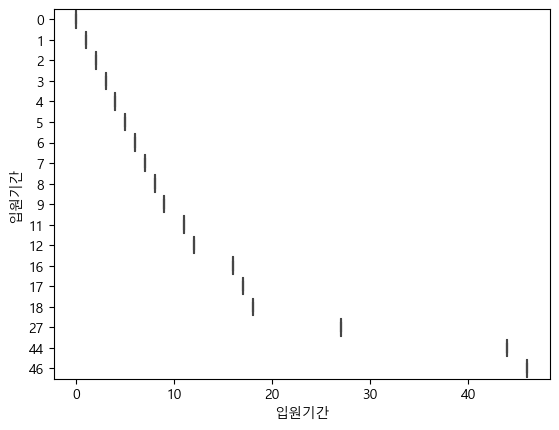

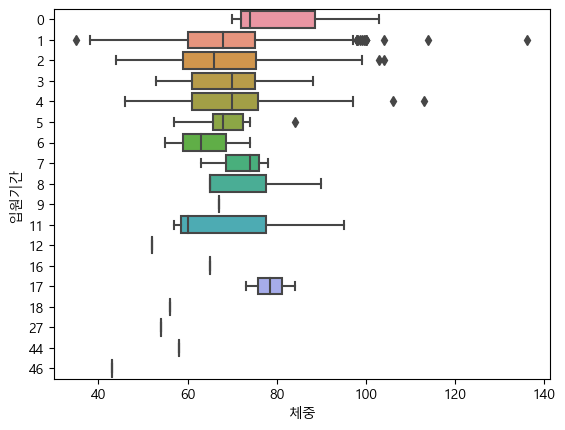

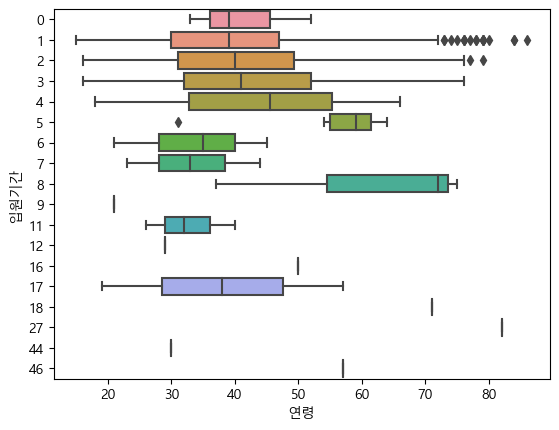

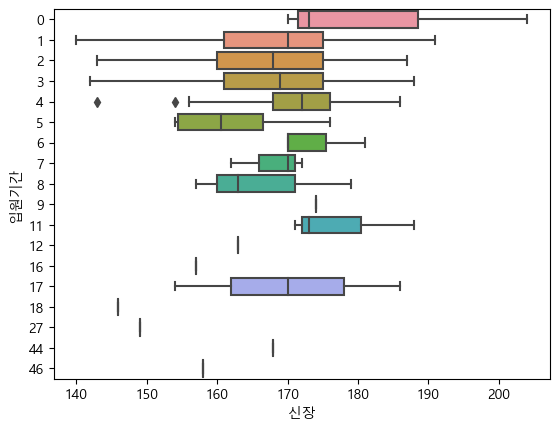

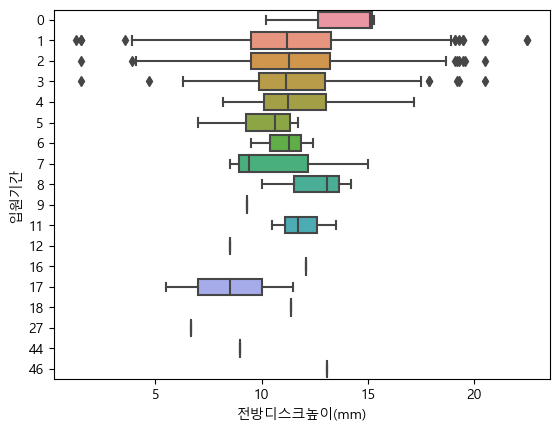

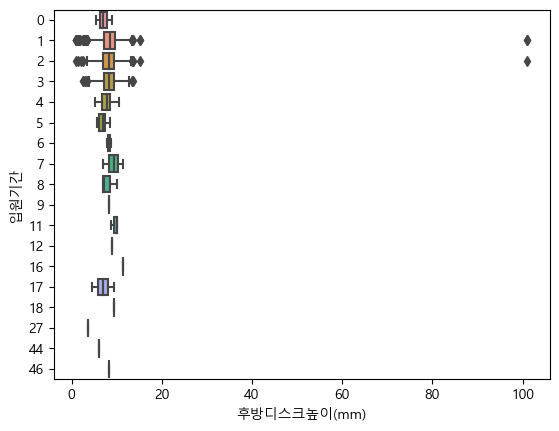

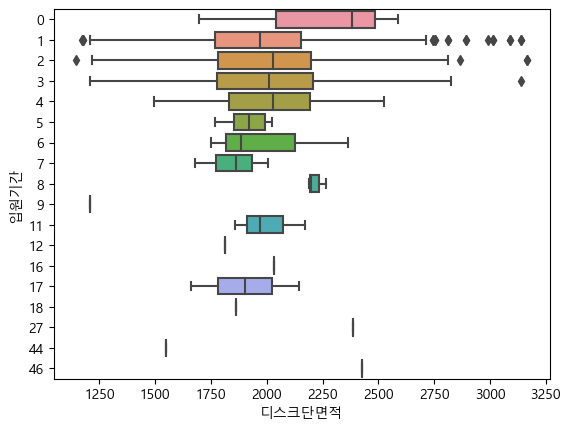

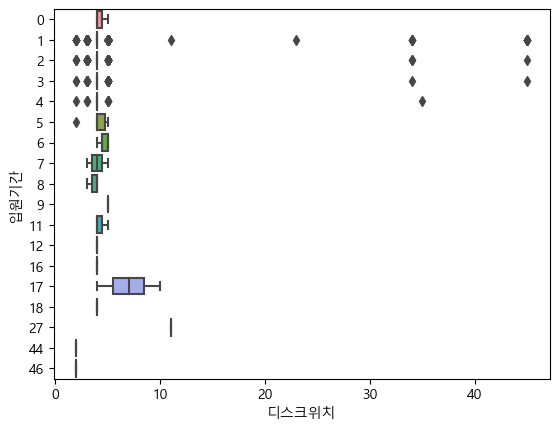

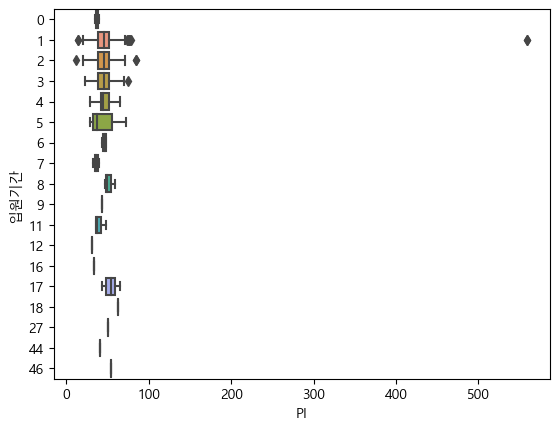

In [61]:
for item in continous_list :
    sns.boxplot(data=df_ROS_select, x=item, y='입원기간', orient='h') # orient='h'목표변수 y에 위치하게끔
    plt.show()

#### 범주형/범주형

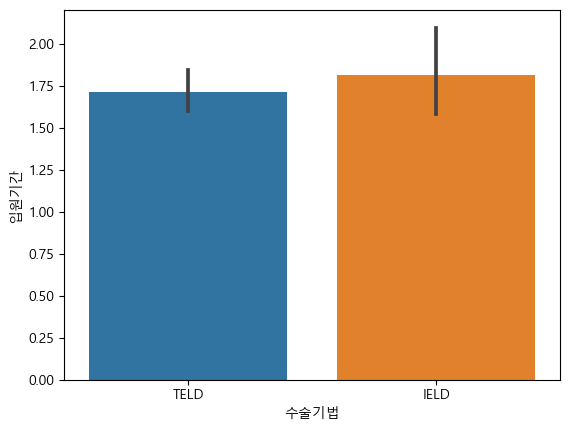

In [57]:
sns.barplot(data=df_ROS_GB, x='수술기법', y='입원기간')
plt.show()

## 수술기법에 따라 입원기간의 차이가 나지 않음을 확인할수 있음.

### 보고서
- 변수간 상관성 확인용
    - 목표변수 : 비정규 분포
    - 설명변수
        1. type_of_contract(범주형) : 2개 항목
        2. product(범주형) : 상위 3개 항목
        3. age(연속형) : 상관 계수가 -0.003539 <0.5보다 작아서 설명 변수로 채택 어려움>
        4. datetime(순서형) : 분포 특성상 요일별로 변환
        5. day_name(범주형) : 요일별 분석을 위한 컬럼 추가